In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## get datasets
salaries = pd.read_csv('./files/Salaries.csv')
schools = pd.read_csv('./files/Schools.csv')
college = pd.read_csv('./files/CollegePlaying.csv')

In [3]:
schools.head()

,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [4]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [5]:
college.head()

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


<h1> AVERAGE SALARIES BY MOST POPULAR SCHOOL, MOST POPULAR STATE FOR COLLEGE </h1>

In [6]:
## bring in school to player salary DF
salaries_college = pd.merge(salaries,college.iloc[:,:2], on='playerID')

salaries_college_state = pd.merge(salaries_college,schools[['schoolID','state']],on='schoolID')

salaries_college_state.head()

,yearID,teamID,lgID,playerID,salary,schoolID,state
0,1985,ATL,NL,bedrost01,550000,newhaven,CT
1,1986,PHI,NL,bedrost01,650000,newhaven,CT
2,1987,PHI,NL,bedrost01,1050000,newhaven,CT
3,1988,PHI,NL,bedrost01,925000,newhaven,CT
4,1989,PHI,NL,bedrost01,1450000,newhaven,CT


In [7]:
## get count of schools
popular_schools = salaries_college_state['schoolID'].groupby(salaries_college_state['schoolID']).value_counts().sort_values(ascending = False)
popular_schools.head(10)

## THESE ARE NOT UNIQUE COMBOS THOUGH

schoolID   schoolID 
ucla       ucla         718
usc        usc          655
arizonast  arizonast    632
stanford   stanford     595
lsu        lsu          592
miamifl    miamifl      492
floridast  floridast    487
texas      texas        477
calstfull  calstfull    471
gatech     gatech       446
Name: schoolID, dtype: int64

In [8]:
## get unique combo of player + school to get each school a player went to
## will have players at multiple schools w/ same average salary
grouped_salaries_college = salaries_college_state.groupby(['playerID','schoolID'], as_index=False)

## do same for player + state of college + teams

grouped_salaries_state = salaries_college_state.groupby(['playerID','state'], as_index=False)

In [9]:
## get mean salary of a player (MAYBE MEDIAN?)
mean_salary_player_college = grouped_salaries_college.mean()
mean_salary_player_college = mean_salary_player_college[['schoolID','salary','playerID']]

mean_salary_player_state = grouped_salaries_state.mean()
mean_salary_player_state = mean_salary_player_state[['state','salary','playerID']]

print(mean_salary_player_college.head())
print(type(mean_salary_player_college),'\n')

print(mean_salary_player_state.head())

   schoolID        salary   playerID
0    pennst  1.322821e+06  aardsda01
1      rice  1.322821e+06  aardsda01
2   gamiddl  3.270000e+05   abadan01
3  kentucky  2.462500e+05  abbotje01
4  michigan  1.440056e+06  abbotji01
<class 'pandas.core.frame.DataFrame'> 

  state        salary   playerID
0    PA  1.322821e+06  aardsda01
1    TX  1.322821e+06  aardsda01
2    GA  3.270000e+05   abadan01
3    KY  2.462500e+05  abbotje01
4    MI  1.440056e+06  abbotji01


In [10]:
## find most frequent colleges + states +
top_colleges = mean_salary_player_college['playerID'].groupby(mean_salary_player_college['schoolID']).count().sort_values(ascending = False)
print(top_colleges.head(10),'\n')

top_states = mean_salary_player_state['playerID'].groupby(mean_salary_player_state['state']).count().sort_values(ascending = False)
print(top_states.head(10))

schoolID
arizonast    51
stanford     44
usc          44
ucla         41
texas        41
lsu          40
miamifl      38
calstfull    34
okstate      33
florida      33
Name: playerID, dtype: int64 

state
CA    596
FL    275
TX    255
AZ    122
LA    103
OK    101
NC    101
IL     96
SC     81
AL     78
Name: playerID, dtype: int64


In [11]:
## list of top colleges and states
college_names = ['arizonast','stanford','usc','ucla','texas','lsu','miamifl','calstfull','okstate','arizona']
#print(type(school_names))

#keep states > 100
state_names = ['CA','FL','TX','AZ','LA','OK','NC']

In [12]:
## get just those records from top schools
top_colleges_avg_salary = mean_salary_player_college[mean_salary_player_college['schoolID'].isin(college_names)]
top_colleges_avg_salary = top_colleges_avg_salary[['schoolID','salary']]

top_states_avg_salary = mean_salary_player_state[mean_salary_player_state['state'].isin(state_names)]
top_states_avg_salary = top_states_avg_salary[['state','salary']]

print(top_colleges_avg_salary.head(10))
print(top_states_avg_salary.head(10))

    schoolID        salary
10     texas  4.265000e+05
18  stanford  1.478333e+05
20   okstate  3.010000e+05
24       lsu  2.848750e+05
29  stanford  2.615000e+05
39   miamifl  1.560000e+06
43       usc  1.700000e+05
49      ucla  3.962500e+05
50  stanford  1.780000e+05
51      ucla  4.467000e+05
   state        salary
1     TX  1.322821e+06
5     CA  1.295000e+05
6     FL  3.270000e+05
9     TX  4.265000e+05
10    NC  2.460000e+06
13    CA  1.805000e+05
15    TX  2.954400e+06
16    NC  3.295000e+05
17    CA  1.478333e+05
19    OK  3.010000e+05


In [13]:
# group the salaries by college + state
print(np.array(top_colleges_avg_salary['salary'].groupby(top_colleges_avg_salary['schoolID']).mean()),'\n')
print(np.array(top_states_avg_salary['salary'].groupby(top_states_avg_salary['state']).mean()),'\n')

[  853386.00467136  1367384.31788712  1092950.99924765  1221145.03250888
  1658218.56270075   860608.77326377  1091013.31845238   868401.947516
  1283692.32301421  1579411.07092175] 

[ 1155620.47824875  1110263.94430724  1035668.07309999  1087084.27247566
   837998.14845935   881364.40639949  1021279.06790348] 



In [15]:
sorted_colleges = sorted(top_colleges_avg_salary['schoolID'].unique())
med_salary_college = np.array(top_colleges_avg_salary['salary'].groupby(top_colleges_avg_salary['schoolID']).median())
avg_salary_college = np.array(top_colleges_avg_salary['salary'].groupby(top_colleges_avg_salary['schoolID']).mean())

sorted_states = sorted(top_states_avg_salary['state'].unique())
med_salary_states = np.array(top_states_avg_salary['salary'].groupby(top_states_avg_salary['state']).median())
avg_salary_states = np.array(top_states_avg_salary['salary'].groupby(top_states_avg_salary['state']).mean())

average_career_salary_college = pd.DataFrame({
    'med_salary_college': med_salary_college,
    'avg_salary_college': avg_salary_college
}, index = sorted_colleges)

average_career_salary_state = pd.DataFrame({
    'med_salary_states': med_salary_states,
    'avg_salary_states': avg_salary_states
}, index = sorted_states)


print(average_career_salary_college.head(),'\n')
print(average_career_salary_state.head())

           avg_salary_college  med_salary_college
arizona          8.533860e+05       405000.000000
arizonast        1.367384e+06       477500.000000
calstfull        1.092951e+06       498125.000000
lsu              1.221145e+06       515391.666667
miamifl          1.658219e+06       521972.222222 

    avg_salary_states  med_salary_states
AZ       1.155620e+06           434125.0
CA       1.110264e+06           463000.0
FL       1.035668e+06           414000.0
LA       1.087084e+06           440500.0
NC       8.379981e+05           490500.0


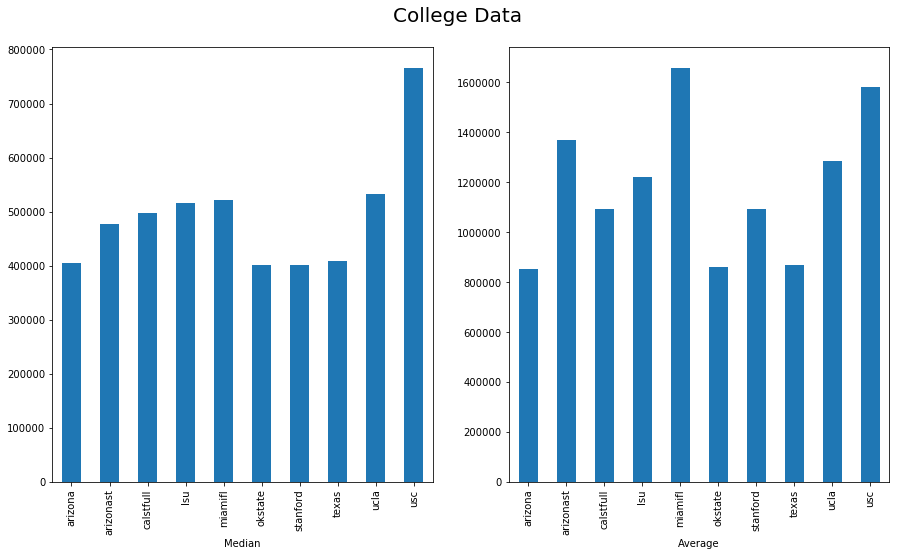

In [16]:
## test plot
%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(15,8)) 

fig.suptitle("College Data", fontsize = 20, y = 0.95)

average_career_salary_college['med_salary_college'].plot(kind = 'bar', ax = axes[0])
average_career_salary_college['avg_salary_college'].plot(kind = 'bar', ax = axes[1])

axes[0].set_xlabel('Median')
#axes[0].set_xticks()

axes[1].set_xlabel('Average')
#axes[1].set_xticks(rotation=45)

plt.show()

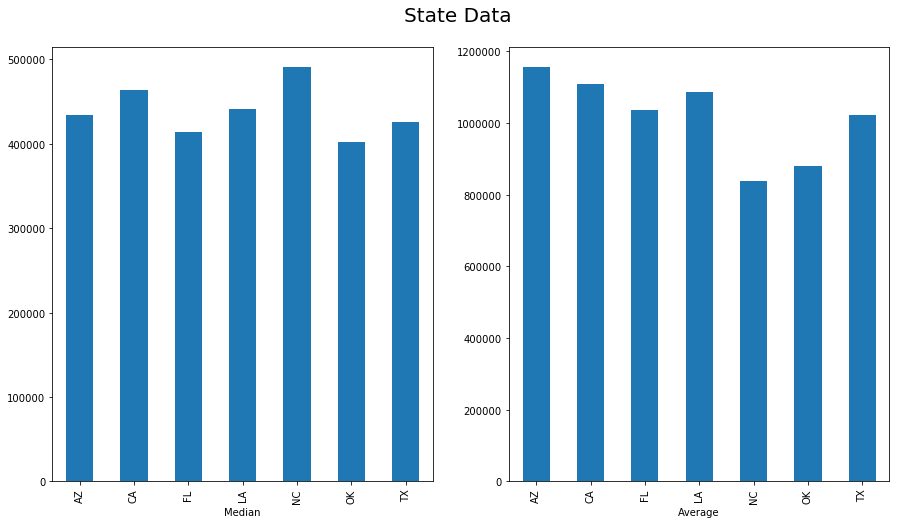

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15,8)) 

fig.suptitle("State Data", fontsize = 20, y = 0.95)

average_career_salary_state['med_salary_states'].plot(kind = 'bar', ax = axes[0])
average_career_salary_state['avg_salary_states'].plot(kind = 'bar', ax = axes[1])

axes[0].set_xlabel('Median')
#axes[0].set_xticks()

axes[1].set_xlabel('Average')
#axes[1].set_xticks(rotation=45)

plt.show()

In [54]:
import folium # conda install -c ioos folium=0.2.1 

state_geo = 'C:/folium-master/examples/data/us-states.json' # from w/in folium package

# Setup a folium map at a high-level zoom @Alok (100,0) are NOT lat long coordinates
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# use built-in method "choropleth" for choropleth maps that bind Pandas Data Frames and json geometries together.  
# This allows us to quickly visualize data combinations

plot_data = average_career_salary_state['med_salary_states']

map.choropleth(geo_path = state_geo, data = plot_data,
               columns = ['StateCode','Value'],
               key_on = 'feature.id',  # refers to label in the JSON object that has country code as the feature ID
               fill_color = 'YlGnBu', fill_opacity = 0.7,
               line_opacity = 0.2,
              # legend_name = legend_label
              )

# Create Folium plot
map.save('plot_data.html')

# Import the Folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [25]:
## group dataframe by team, check mean salary of each

grouped_salaries_team = salaries_college_state.groupby(['teamID'], as_index=False)
grouped_salaries_team['salary'].mean().head()

,teamID,salary
0,ANA,1.941196e+06
1,ARI,2.669340e+06
2,ATL,1.677754e+06
3,BAL,1.998160e+06
4,BOS,2.503153e+06


In [32]:
team_avg_salary = grouped_salaries_team['salary'].mean()
team_med_salary = grouped_salaries_team['salary'].median()

print(team_avg_salary.head())
print(team_med_salary.head())

  teamID        salary
0    ANA  1.941196e+06
1    ARI  2.669340e+06
2    ATL  1.677754e+06
3    BAL  1.998160e+06
4    BOS  2.503153e+06
  teamID   salary
0    ANA   500000
1    ARI  1350000
2    ATL   515000
3    BAL   750000
4    BOS   805000


In [38]:
## create DataFrames of average and median salaries by team
team_avg_salary = grouped_salaries_team['salary'].mean()
team_med_salary = grouped_salaries_team['salary'].median()

print(team_avg_salary.head())
print(team_med_salary.head())

  teamID        salary
0    ANA  1.941196e+06
1    ARI  2.669340e+06
2    ATL  1.677754e+06
3    BAL  1.998160e+06
4    BOS  2.503153e+06
  teamID   salary
0    ANA   500000
1    ARI  1350000
2    ATL   515000
3    BAL   750000
4    BOS   805000


In [40]:
## put the DataFrame into list for the index and arrays for the data
sorted_teams = sorted(team_avg_salary['teamID'].unique())
avg_team_salary = np.array(team_avg_salary['salary'])
med_team_salary = np.array(team_med_salary['salary'])

print(sorted_teams[:5])
print(avg_team_salary[:5])
print(med_team_salary[:5])

['ANA', 'ARI', 'ATL', 'BAL', 'BOS']
[ 1941196.01318267  2669339.82803943  1677753.94720169  1998159.68257411
  2503152.63230994]
[ 500000 1350000  515000  750000  805000]


In [46]:
## create new DataFrame with both arrays as columns
average_team_salary_df = pd.DataFrame({
    'med_salary': med_team_salary,
    'avg_salary': avg_team_salary
}, index = sorted_teams)

average_team_salary_df.head()

,avg_salary,med_salary
ANA,1.941196e+06,500000
ARI,2.669340e+06,1350000
ATL,1.677754e+06,515000
BAL,1.998160e+06,750000
BOS,2.503153e+06,805000


In [47]:
## Create 2 new DataFrames, sorted by respective columns
sorted_avg_salary = average_team_salary_df.sort_values(by='avg_salary', ascending=False)
sorted_med_salary = average_team_salary_df.sort_values(by='med_salary', ascending=False)

print(sorted_avg_salary.head(),'\n')
print(sorted_med_salary.head())

       avg_salary  med_salary
NYY  1.381071e+07    13500000
SFG  9.518590e+06     9000000
WSN  6.898691e+06     4000000
CHC  6.358333e+06     2500000
NYM  5.871053e+06     4325000 

       avg_salary  med_salary
NYY  1.381071e+07    13500000
SFG  9.518590e+06     9000000
KCR  5.412500e+06     5500000
LAD  4.831629e+06     4500000
NYM  5.871053e+06     4325000


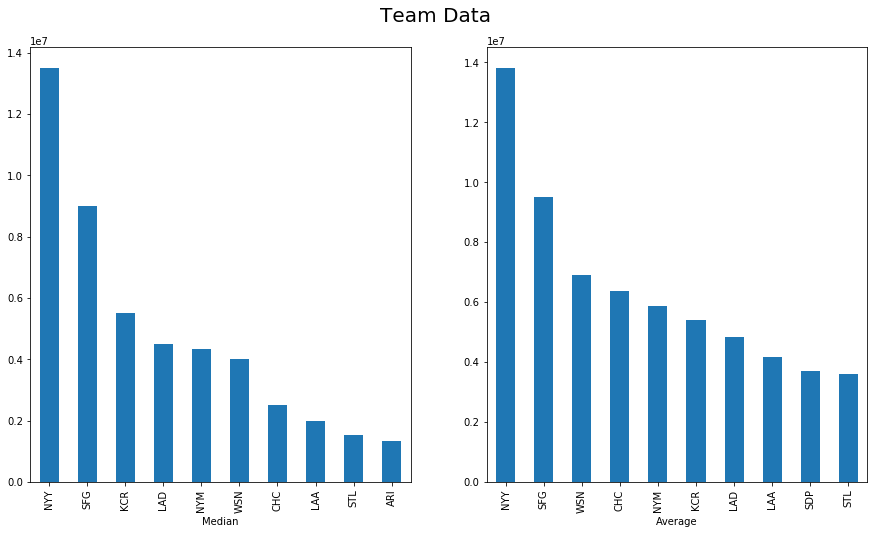

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(15,8)) 

fig.suptitle("Team Data", fontsize = 20, y = 0.95)

sorted_avg_salary['avg_salary'].head(10).plot(kind = 'bar', ax = axes[1])
sorted_med_salary['med_salary'].head(10).plot(kind = 'bar', ax = axes[0])

axes[0].set_xlabel('Median')
#axes[0].set_xticks()

axes[1].set_xlabel('Average')
#axes[1].set_xticks(rotation=45)

plt.show()

In [55]:
## bring in career stats and compare relationships w/ avg career salary
batting = pd.read_csv('./files/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [56]:
salaries_college_state.head()

,yearID,teamID,lgID,playerID,salary,schoolID,state
0,1985,ATL,NL,bedrost01,550000,newhaven,CT
1,1986,PHI,NL,bedrost01,650000,newhaven,CT
2,1987,PHI,NL,bedrost01,1050000,newhaven,CT
3,1988,PHI,NL,bedrost01,925000,newhaven,CT
4,1989,PHI,NL,bedrost01,1450000,newhaven,CT


In [57]:
# average stats by player ID
batting_2 = batting.groupby(['playerID'], as_index=False)
print(batting_2)

In [58]:
del batting['stint']
del batting['lgID']
del batting['teamID']
batting.head()

,playerID,yearID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [60]:
print(pd.merge(salaries_college_state,batting.iloc[:,],on=['playerID','yearID']).shape)
print(pd.merge(salaries_college_state,batting.iloc[:,],on=['playerID','yearID']).head())

(41060, 24)
   yearID teamID lgID   playerID   salary  schoolID state   G  AB  R  ...   \
0    1985    ATL   NL  bedrost01   550000  newhaven    CT  37  64  3  ...    
1    1986    PHI   NL  bedrost01   650000  newhaven    CT  68   5  0  ...    
2    1987    PHI   NL  bedrost01  1050000  newhaven    CT  65   4  0  ...    
3    1988    PHI   NL  bedrost01   925000  newhaven    CT  57   2  0  ...    
4    1989    PHI   NL  bedrost01  1450000  newhaven    CT  28   0  0  ...    

   RBI   SB   CS  BB    SO  IBB  HBP   SH   SF  GIDP  
0  1.0  0.0  0.0   1  22.0  0.0  0.0  6.0  0.0   0.0  
1  0.0  0.0  0.0   1   1.0  0.0  0.0  0.0  0.0   0.0  
2  0.0  0.0  0.0   0   3.0  0.0  0.0  0.0  0.0   0.0  
3  0.0  0.0  0.0   0   2.0  0.0  0.0  0.0  0.0   0.0  
4  0.0  0.0  0.0   0   0.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 24 columns]


In [61]:
career_avg = pd.merge(salaries_college_state,batting,on=['playerID','yearID'])
del career_avg['schoolID']
del career_avg['state']

In [62]:
career_avg.head()

,yearID,teamID,lgID,playerID,salary,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,bedrost01,550000,37,64,3,5,0,...,1.0,0.0,0.0,1,22.0,0.0,0.0,6.0,0.0,0.0
1,1986,PHI,NL,bedrost01,650000,68,5,0,1,0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
2,1987,PHI,NL,bedrost01,1050000,65,4,0,0,0,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
3,1988,PHI,NL,bedrost01,925000,57,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,1989,PHI,NL,bedrost01,1450000,28,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
test_player = career_avg[career_avg['playerID'] == 'bedrost01']
test_player.head()

,yearID,teamID,lgID,playerID,salary,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,1985,ATL,NL,bedrost01,550000,37,64,3,5,0,...,1.0,0.0,0.0,1,22.0,0.0,0.0,6.0,0.0,0.0
1,1986,PHI,NL,bedrost01,650000,68,5,0,1,0,...,0.0,0.0,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0
2,1987,PHI,NL,bedrost01,1050000,65,4,0,0,0,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
3,1988,PHI,NL,bedrost01,925000,57,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
4,1989,PHI,NL,bedrost01,1450000,28,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
test_player.mean()

yearID      1989.727273
salary    988636.363636
G             49.363636
AB             8.090909
R              0.272727
H              0.909091
2B             0.000000
3B             0.000000
HR             0.000000
RBI            0.181818
SB             0.000000
CS             0.000000
BB             0.181818
SO             3.181818
IBB            0.000000
HBP            0.000000
SH             0.545455
SF             0.000000
GIDP           0.000000
dtype: float64

In [65]:
career_avg_realized = career_avg.groupby(career_avg['playerID'], as_index=False).mean()
career_avg_realized.head()

,playerID,yearID,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2008.333333,7.932917e+05,35.0,0.166667,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.166667,0.0,0.00,0.00,0.00,0.00
1,abadan01,2006.000000,3.270000e+05,5.0,3.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,2.0,0.000000,0.0,0.00,0.00,0.00,0.00
2,abbotje01,1999.500000,2.462500e+05,53.5,139.500000,18.5,36.75,8.0,0.5,4.25,20.25,1.5,1.25,9.5,21.250000,0.5,0.75,1.25,1.75,2.25
3,abbotji01,1993.400000,1.573550e+06,25.8,2.100000,0.0,0.20,0.0,0.0,0.00,0.30,0.0,0.00,0.0,1.000000,0.0,0.00,0.30,0.00,0.10
4,abbotky01,1993.500000,1.295000e+05,24.5,15.500000,1.0,1.50,0.5,0.0,0.00,1.00,0.0,0.00,0.5,9.500000,0.0,0.00,3.00,0.00,0.00


In [66]:
career_avg_realized[career_avg_realized['playerID'] == 'bedrost01']

,playerID,yearID,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
140,bedrost01,1989.727273,988636.363636,49.363636,8.090909,0.272727,0.909091,0.0,0.0,0.0,0.181818,0.0,0.0,0.181818,3.181818,0.0,0.0,0.545455,0.0,0.0


In [67]:
numerics = career_avg_realized.iloc[:,2:]
numerics.head()

,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,7.932917e+05,35.0,0.166667,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.166667,0.0,0.00,0.00,0.00,0.00
1,3.270000e+05,5.0,3.000000,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,2.0,0.000000,0.0,0.00,0.00,0.00,0.00
2,2.462500e+05,53.5,139.500000,18.5,36.75,8.0,0.5,4.25,20.25,1.5,1.25,9.5,21.250000,0.5,0.75,1.25,1.75,2.25
3,1.573550e+06,25.8,2.100000,0.0,0.20,0.0,0.0,0.00,0.30,0.0,0.00,0.0,1.000000,0.0,0.00,0.30,0.00,0.10
4,1.295000e+05,24.5,15.500000,1.0,1.50,0.5,0.0,0.00,1.00,0.0,0.00,0.5,9.500000,0.0,0.00,3.00,0.00,0.00


In [68]:
numerics.corr()

,salary,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
salary,1.000000,0.355732,0.372610,0.415290,0.390602,0.404691,0.255940,0.463733,0.439330,0.213992,0.189891,0.406058,0.374015,0.399721,0.319622,0.135134,0.373041,0.349677
G,0.355732,1.000000,0.917593,0.898191,0.910387,0.893125,0.713892,0.768213,0.873408,0.575529,0.681210,0.859475,0.846679,0.655135,0.675233,0.306402,0.832541,0.849524
AB,0.372610,0.917593,1.000000,0.979840,0.994250,0.975889,0.773029,0.847203,0.956838,0.627330,0.727591,0.925253,0.921867,0.703068,0.739354,0.349816,0.912706,0.930316
R,0.415290,0.898191,0.979840,1.000000,0.984843,0.969066,0.793996,0.867870,0.955542,0.676829,0.755591,0.945890,0.903084,0.720200,0.744032,0.309801,0.900257,0.890975
H,0.390602,0.910387,0.994250,0.984843,1.000000,0.981397,0.780607,0.843158,0.958834,0.638675,0.732707,0.922522,0.895542,0.716410,0.733918,0.323863,0.915119,0.929736
2B,0.404691,0.893125,0.975889,0.969066,0.981397,1.000000,0.737536,0.855066,0.958768,0.576313,0.672662,0.912512,0.896489,0.718040,0.741861,0.276032,0.916388,0.918935
3B,0.255940,0.713892,0.773029,0.793996,0.780607,0.737536,1.000000,0.526798,0.663470,0.776517,0.795682,0.687676,0.679511,0.454180,0.559461,0.367773,0.648073,0.614131
HR,0.463733,0.768213,0.847203,0.867870,0.843158,0.855066,0.526798,1.000000,0.946944,0.376109,0.466127,0.866803,0.877310,0.767804,0.656665,0.042300,0.832785,0.811855
RBI,0.439330,0.873408,0.956838,0.955542,0.958834,0.958768,0.663470,0.946944,1.000000,0.498777,0.604502,0.928531,0.909115,0.784291,0.710658,0.190502,0.930305,0.920716
SB,0.213992,0.575529,0.627330,0.676829,0.638675,0.576313,0.776517,0.376109,0.498777,1.000000,0.896471,0.563085,0.512450,0.334966,0.452189,0.382712,0.490118,0.458468


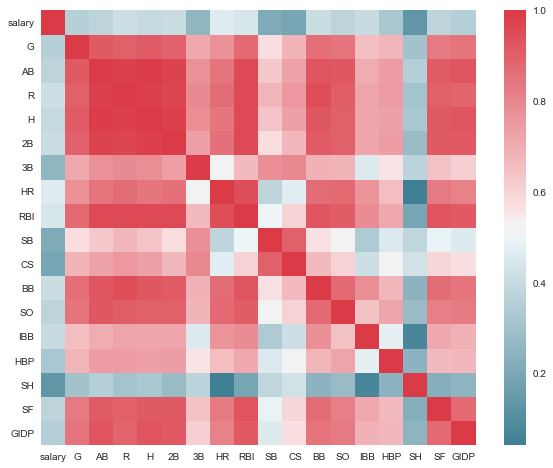

In [69]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))

corr = numerics.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [70]:
numerics.iloc[:,1:]

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,35.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
1,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,53.500000,139.500000,18.500000,36.750000,8.000000,0.500000,4.250000,20.250000,1.500000,1.250000,9.500000,21.250000,0.500000,0.750000,1.250000,1.750000,2.250000
3,25.800000,2.100000,0.000000,0.200000,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.300000,0.000000,0.100000
4,24.500000,15.500000,1.000000,1.500000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,9.500000,0.000000,0.000000,3.000000,0.000000,0.000000
5,111.000000,255.000000,39.000000,54.000000,12.000000,2.000000,5.000000,24.000000,6.000000,5.000000,18.000000,78.000000,2.000000,3.000000,4.000000,1.000000,2.000000
6,30.166667,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
7,40.428571,8.000000,0.428571,0.714286,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,4.000000,0.000000,0.000000,0.571429,0.000000,0.285714
8,38.111111,6.000000,0.222222,1.000000,0.111111,0.000000,0.000000,0.111111,0.000000,0.000000,0.222222,3.555556,0.000000,0.000000,0.000000,0.000000,0.111111
9,90.833333,298.666667,37.000000,70.166667,13.000000,1.833333,6.666667,30.000000,4.166667,2.000000,25.666667,56.666667,1.500000,0.833333,1.833333,1.500000,3.666667


In [73]:
# use train_test_split(input, output, test_size, random_state) from sklearn.modelselection
#    - takes in 2 DataFrames and returns 4 DataFrames
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = numerics.iloc[:,1:]
y = numerics['salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 324)

In [75]:
# create a regressor (model) object with LinearRegression() from sklearn.linear_model
regressor_lm = LinearRegression()
type(regressor_lm)

# fit our linear regression model to both sets of training data
#    - .fit() fine tunes the parameters of the model to capture the interaction between the training sets
regressor_lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
# get outcome predictions for the test set (NEW DATA) from the linear regression model created above using .predict()
y_test_predictions = regressor_lm.predict(x_test)
y_test_predictions

array([  879007.1136292 ,   526473.05598115,  4054842.49847795,
         845193.27666158,   625375.63868292,   841503.49047515,
        1010577.16431582,   880771.86113854,   778560.90744014,
         668986.82396653,   792184.16608715,   725242.2586976 ,
         561953.45860906,  4128139.27959608,   866610.8587837 ,
         671441.66892061,   651495.15168976,   989593.54585212,
         823727.18123469,   942902.58924121,   817751.19581092,
         946002.31752372,   916510.73678325,   427559.69146779,
         548975.22987358,   276956.58381921,  2091658.92879694,
        1139017.13373205,  1878070.37320233,   701531.87347889,
         910280.56745702,   947563.54236334,  6710285.43674459,
         796150.46397145,   600013.05741236,   653985.37470491,
         833239.32057815,   790945.16073503,   900853.6861302 ,
        1239374.03605861,   563976.67913519,   526473.05598115,
         586478.85302762,   701446.48691436,   695239.36017436,
         505959.358059  ,   616657.53438

In [77]:
y_test.describe()

count    8.600000e+02
mean     1.095448e+06
std      1.681425e+06
min      6.000000e+04
25%      2.049688e+05
50%      4.721792e+05
75%      1.154550e+06
max      1.473594e+07
Name: salary, dtype: float64

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE_lm = sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_predictions))
print(RMSE_lm)

1354113.039769305


In [79]:
from sklearn.tree import DecisionTreeRegressor

# create a decision tree regressor (model) object with DecisionTreeRegressor() from sklearn.tree
#    - this builds a model by splitting data on an attribute in a top-down manner 
#    - the algorithm chooses the attribute which gives the maximum reduction in standard deviation
regressor_t = DecisionTreeRegressor(max_depth=20)
regressor_t.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [80]:
y_test_predictions_tree = regressor_t.predict(x_test)
y_test_predictions_tree

array([   513423.33333333,    278500.        ,   4863975.        ,
          522666.66666667,    518833.33333333,    200000.        ,
          437500.        ,    119500.        ,   1493750.        ,
          391100.        ,    119500.        ,    402000.        ,
          502000.        ,   4699789.26315789,    448642.85714286,
          165000.        ,    109000.        ,    397916.75      ,
          472991.66666667,   2582090.90909091,    489750.        ,
          203333.33333333,   1737777.77777778,    919400.        ,
          276480.        ,    417850.        ,    467500.        ,
          588333.42857143,    143666.66666667,   3210046.33333333,
         1570702.67857143,    649779.01666667,   4863975.        ,
         3669285.71428571,    173000.        ,    109000.        ,
         1084444.44444444,    100000.        ,   2039666.66666667,
         3633571.42857143,    229171.42857143,    278500.        ,
          250500.        ,   1393333.33333333,    260937.5    

In [81]:
y_test.describe()

count    8.600000e+02
mean     1.095448e+06
std      1.681425e+06
min      6.000000e+04
25%      2.049688e+05
50%      4.721792e+05
75%      1.154550e+06
max      1.473594e+07
Name: salary, dtype: float64

In [83]:
# use mean_squared_error from sklearn metrics to get the MSE from our test actuals and test predictions
RMSE_tree = sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_predictions_tree))
print(RMSE_tree)

1780591.4790495213


In [86]:
numerics.columns

Index(['salary', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS',
       'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [96]:
not_low_corr = ['H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO']

In [97]:
x = numerics[not_low_corr]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 324)

# create a regressor (model) object with LinearRegression() from sklearn.linear_model
regressor_lm = LinearRegression()

# fit our linear regression model to both sets of training data
#    - .fit() fine tunes the parameters of the model to capture the interaction between the training sets
regressor_lm.fit(x_train, y_train)

# get outcome predictions for the test set (NEW DATA) from the linear regression model created above using .predict()
y_test_predictions = regressor_lm.predict(x_test)

print(y_test.describe())

RMSE_lm = sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_predictions))

print(RMSE_lm)

count    8.600000e+02
mean     1.095448e+06
std      1.681425e+06
min      6.000000e+04
25%      2.049688e+05
50%      4.721792e+05
75%      1.154550e+06
max      1.473594e+07
Name: salary, dtype: float64
1442865.2050729175
